<a href="https://colab.research.google.com/github/BrilliantChard/Data-Science-Projects/blob/main/Netlix%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/netflix_data.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [4]:
df.describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [6]:
df.nunique()

,0
show_id,4812
type,2
title,4812
director,3615
cast,4690
country,72
date_added,1292
release_year,71
duration,193
description,4807


In [7]:
df.shape

(4812, 11)

## Plotting Null Values to check which column has null values

<Axes: >

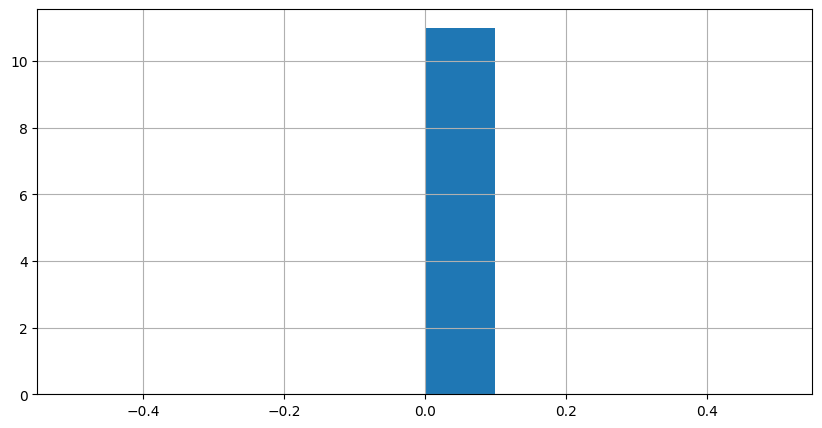

In [8]:
df.isnull().sum().hist(figsize=(10,5))

### Checking Null Values

In [9]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
duration,0
description,0


In [10]:
df.nunique()

,0
show_id,4812
type,2
title,4812
director,3615
cast,4690
country,72
date_added,1292
release_year,71
duration,193
description,4807


In [11]:
grouped_by_type = df.groupby('type')['duration'].mean()

In [12]:
grouped_by_type

,duration
type,
Movie,102.384648
TV Show,1.940741


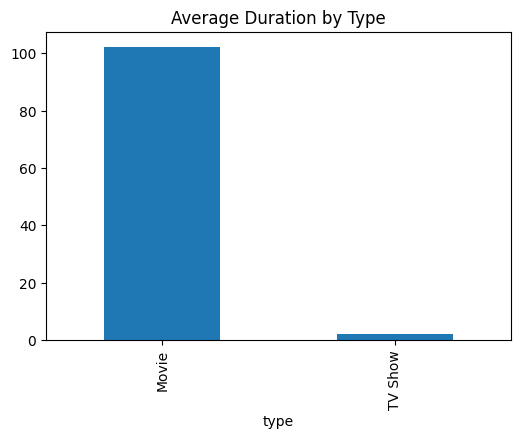

In [13]:
grouped_by_type = df.groupby('type')['duration'].mean().plot(kind='bar', figsize=(6,4), title='Average Duration by Type')

In [14]:
grouped_by_genre = df.groupby('genre')['duration'].mean()
grouped_by_genre

,duration
genre,
Action,113.158046
Anime Features,96.222222
Anime Series,2.666667
British TV,2.550000
Children,83.244656
Classic,15.000000
Classic Movies,118.434783
Comedies,107.184645
Crime TV,1.700000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [16]:
average_duration_by_country = df.groupby('country')['duration'].mean().sort_values(ascending=False)
average_duration_by_country.head(10)

,duration
country,
Croatia,157.000000
Soviet Union,147.000000
India,127.199074
Romania,124.888889
Iran,123.000000
Pakistan,121.055556
Georgia,119.000000
Venezuela,119.000000
Somalia,118.000000


In [17]:
show_count_by_country = df.groupby('country')['show_id'].count().sort_values(ascending=False)
show_count_by_country.head(10)

,show_id
country,
United States,1886
India,864
United Kingdom,311
Canada,155
France,133
Spain,112
Egypt,91
Japan,81
Turkey,81


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [19]:
df.nunique()

,0
show_id,4812
type,2
title,4812
director,3615
cast,4690
country,72
date_added,1292
release_year,71
duration,193
description,4807


In [20]:
median_release_year_by_genre = df.groupby('genre')['release_year'].median().sort_values(ascending=True)
median_release_year_by_genre.head(10)

,release_year
genre,
Classic Movies,1975.0
Cult Movies,1992.0
Reality TV,2013.0
Action,2014.5
TV Horror,2015.0
Uncategorized,2015.0
Sci-Fi,2015.0
Children,2016.0
Comedies,2016.0


In [21]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='mixed', errors='coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       4812 non-null   object        
 1   type          4812 non-null   object        
 2   title         4812 non-null   object        
 3   director      4812 non-null   object        
 4   cast          4812 non-null   object        
 5   country       4812 non-null   object        
 6   date_added    4812 non-null   datetime64[ns]
 7   release_year  4812 non-null   int64         
 8   duration      4812 non-null   int64         
 9   description   4812 non-null   object        
 10  genre         4812 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 413.7+ KB


In [23]:
df['year'] = df['date_added'].dt.year

In [24]:
average_duration_by_year = df.groupby(['year'])['duration'].mean()
average_duration_by_year

,duration
year,
2008,81.000000
2009,66.500000
2010,84.000000
2011,93.461538
2012,62.000000
2013,71.714286
2014,79.428571
2015,79.340000
2016,85.368421


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       4812 non-null   object        
 1   type          4812 non-null   object        
 2   title         4812 non-null   object        
 3   director      4812 non-null   object        
 4   cast          4812 non-null   object        
 5   country       4812 non-null   object        
 6   date_added    4812 non-null   datetime64[ns]
 7   release_year  4812 non-null   int64         
 8   duration      4812 non-null   int64         
 9   description   4812 non-null   object        
 10  genre         4812 non-null   object        
 11  year          4812 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(8)
memory usage: 432.5+ KB


In [26]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,year
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas,2016
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies,2018
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action,2017
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas,2020
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,1,A genetics professor experiments with a treatm...,International TV,2017


<Axes: title={'center': 'Count of Directors by Release Year'}, xlabel='release_year'>

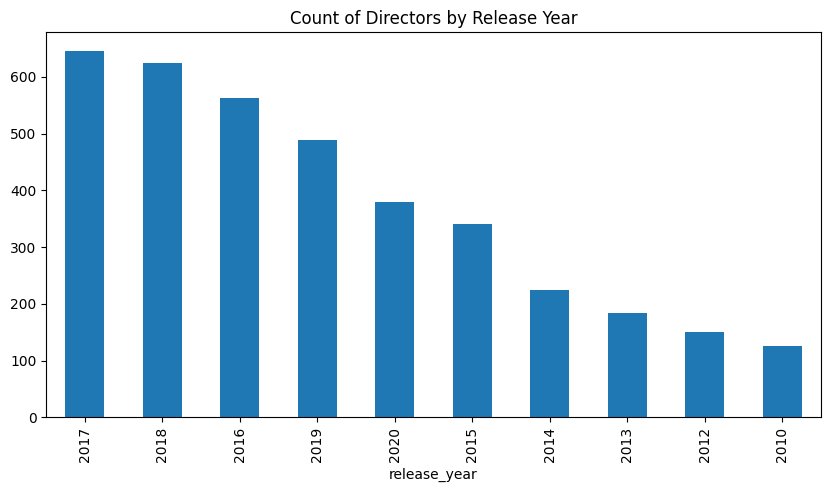

In [27]:
count_of_director_by_release_year = df.groupby('release_year')['director'].count().sort_values(ascending=False)
count_of_director_by_release_year.head(10).plot(kind='bar', figsize=(10,5), title='Count of Directors by Release Year')

# DATA VISUALIZATIONS

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       4812 non-null   object        
 1   type          4812 non-null   object        
 2   title         4812 non-null   object        
 3   director      4812 non-null   object        
 4   cast          4812 non-null   object        
 5   country       4812 non-null   object        
 6   date_added    4812 non-null   datetime64[ns]
 7   release_year  4812 non-null   int64         
 8   duration      4812 non-null   int64         
 9   description   4812 non-null   object        
 10  genre         4812 non-null   object        
 11  year          4812 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(8)
memory usage: 432.5+ KB


In [29]:
df.nunique()

,0
show_id,4812
type,2
title,4812
director,3615
cast,4690
country,72
date_added,1289
release_year,71
duration,193
description,4807


### Scatter Plot of genre and year colored by type

In [30]:
x = df['genre'].head(10)
y = df['release_year']
hue = df['type']

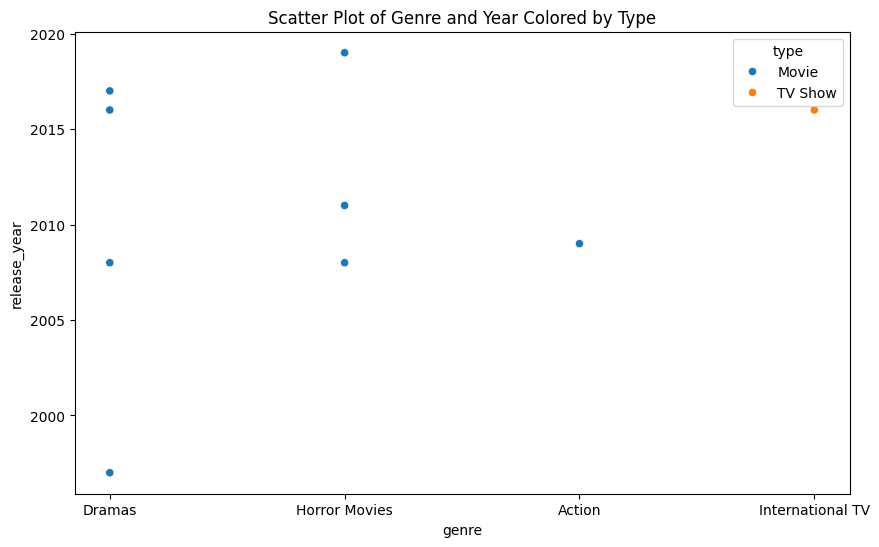

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x = df['genre'].head(10),
    y = df['release_year'].head(10),
    hue = df['type']
)
plt.title('Scatter Plot of Genre and Year Colored by Type')
plt.show()

### Bar Plot of Average Duration by Country

<Axes: title={'center': 'Average Duration by Country'}, xlabel='country'>

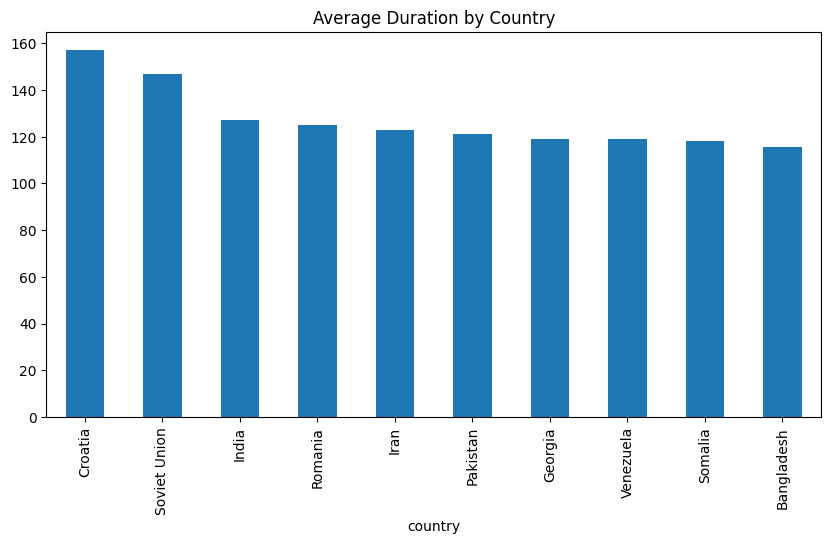

In [32]:
df.groupby('country')['duration'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5), title='Average Duration by Country')

In [33]:
average_duration_by_country = average_duration_by_country.reset_index()

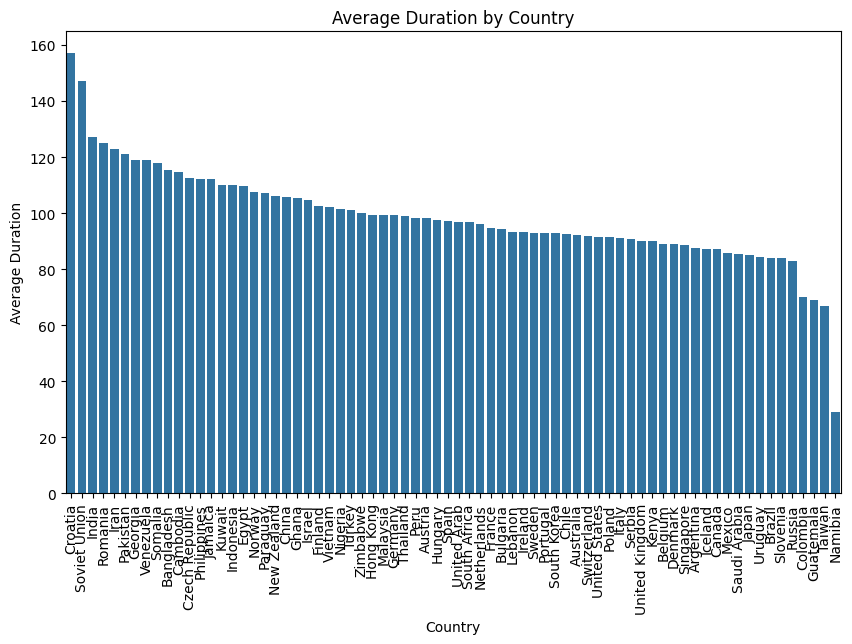

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(
    x = 'country',
    y = 'duration',
    data = average_duration_by_country
)
plt.title('Average Duration by Country')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Duration')
plt.show()

### Pairplot of numerical columns

In [35]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['release_year', 'duration'], dtype='object')

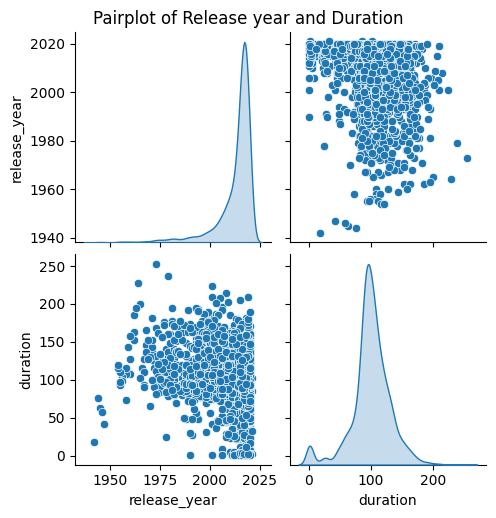

In [36]:
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.suptitle('Pairplot of Release year and Duration', y=1.02)
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       4812 non-null   object        
 1   type          4812 non-null   object        
 2   title         4812 non-null   object        
 3   director      4812 non-null   object        
 4   cast          4812 non-null   object        
 5   country       4812 non-null   object        
 6   date_added    4812 non-null   datetime64[ns]
 7   release_year  4812 non-null   int64         
 8   duration      4812 non-null   int64         
 9   description   4812 non-null   object        
 10  genre         4812 non-null   object        
 11  year          4812 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(8)
memory usage: 432.5+ KB


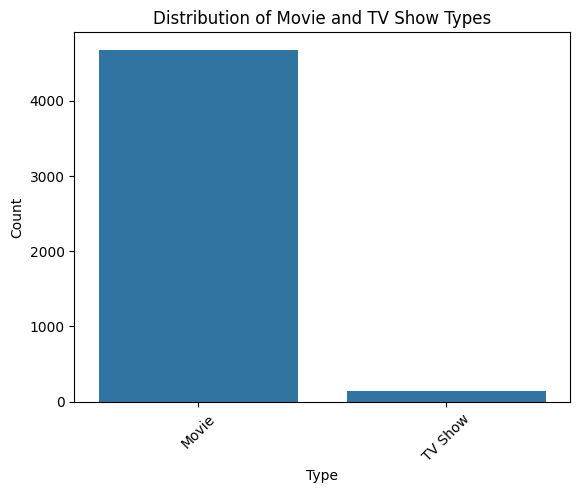

In [38]:
sns.countplot(data=df, x='type')
plt.title('Distribution of Movie and TV Show Types')
plt.xticks(rotation = 45)
plt.xlabel('Type')
plt.ylabel("Count")
plt.show()

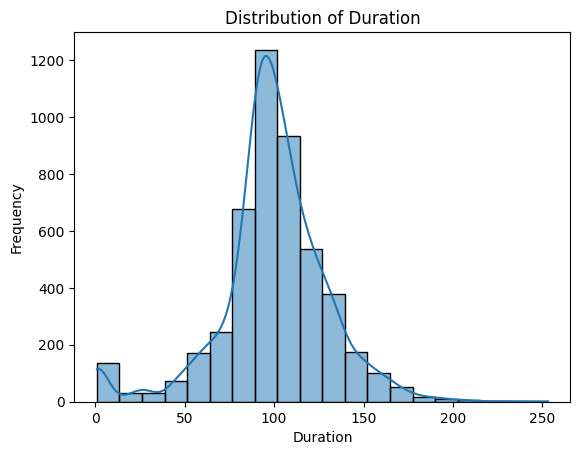

In [39]:
sns.histplot(df['duration'], bins=20, kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       4812 non-null   object        
 1   type          4812 non-null   object        
 2   title         4812 non-null   object        
 3   director      4812 non-null   object        
 4   cast          4812 non-null   object        
 5   country       4812 non-null   object        
 6   date_added    4812 non-null   datetime64[ns]
 7   release_year  4812 non-null   int64         
 8   duration      4812 non-null   int64         
 9   description   4812 non-null   object        
 10  genre         4812 non-null   object        
 11  year          4812 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(8)
memory usage: 432.5+ KB


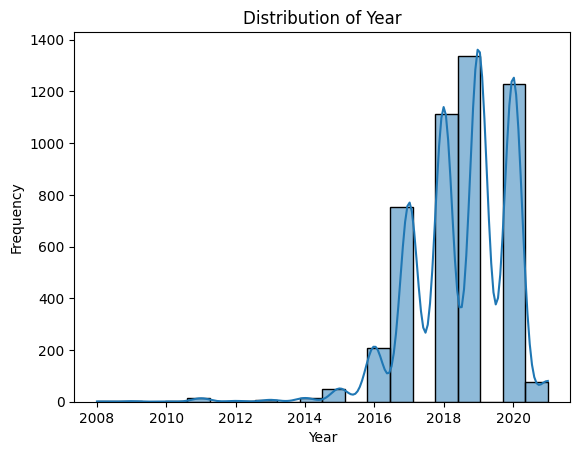

In [41]:
sns.histplot(df['year'], bins = 20, kde = True)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

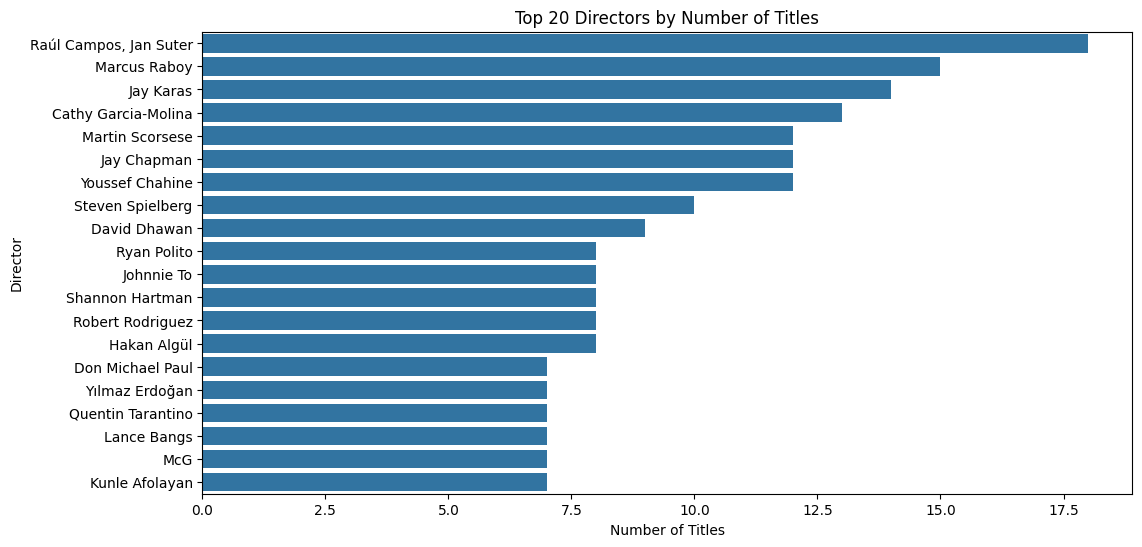

In [42]:
plt.figure(figsize=(12, 6))
top_directors = df['director'].value_counts().head(20).reset_index()
top_directors.columns = ['director', 'count']
sns.barplot(y='director', x='count', data=top_directors)
plt.title('Top 20 Directors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

# Task
The most frequent duration of movies released in the 1990s from the dataset.

## Filter data for movies released in the 1990s

### Subtask:
Filter the DataFrame to include only rows where 'type' is 'Movie' and 'release_year' is between 1990 and 1999 (inclusive).


**Reasoning**:
I will filter the DataFrame `df` to select rows where the 'type' is 'Movie' and the 'release_year' is between 1990 and 1999 (inclusive), storing the result in `movies_1990s`.



In [43]:
movies_1990s = df[(df['type'] == 'Movie') & (df['release_year'] >= 1990) & (df['release_year'] <= 1999)]
movies_1990s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,year
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,119,After one of his high school students attacks ...,Dramas,2019
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,2018-04-01,1993,101,At the center of this engrossing melodrama is ...,Dramas,2018
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,2019-12-01,1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies,2019
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,2020-12-01,1996,108,When a philandering club promoter sets out to ...,Comedies,2020
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,2017-06-01,1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas,2017


**Reasoning**:
Now that the DataFrame is filtered for movies released in the 1990s, I will find the most frequent duration among these movies by calculating the mode of the 'duration' column.



In [44]:
most_frequent_duration = movies_1990s['duration'].mode()[0]
print(f"The most frequent duration of movies released in the 1990s is: {most_frequent_duration} minutes")

The most frequent duration of movies released in the 1990s is: 94 minutes


## Save the result

### Subtask:
Store the calculated most frequent duration as an integer in a variable named `duration`.


## Summary:

### Q&A
The most frequent duration of movies released in the 1990s from the dataset is 94 minutes.

### Data Analysis Key Findings
*   The dataset was filtered to isolate movies released between 1990 and 1999, inclusive.
*   The most frequent duration for these movies was calculated using the mode, which was found to be 94 minutes.

### Insights or Next Steps
*   This finding provides a baseline for typical movie lengths in the 1990s, which could be compared with other decades to observe trends in film duration.
*   Further analysis could involve examining other statistical measures of movie duration (e.g., average, median, range) for this period or segmenting by genre to identify variations.
